In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from keras import callbacks
import math
import warnings  
warnings.filterwarnings("ignore")

C:\Users\MEET\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import datetime
traffic_data = pd.read_csv("T2.csv")

In [3]:
traffic_data = traffic_data.drop(['ID'],axis=1)
traffic_data

,DateTime,Junction,Vehicles
0,01-11-2015 00:00,1,15
1,01-11-2015 01:00,1,13
2,01-11-2015 02:00,1,10
3,01-11-2015 03:00,1,7
4,01-11-2015 04:00,1,9
...,...,...,...
48115,30-06-2017 19:00,4,11
48116,30-06-2017 20:00,4,30
48117,30-06-2017 21:00,4,16
48118,30-06-2017 22:00,4,22


In [4]:
traffic_data['Date'] = pd.to_datetime(traffic_data['DateTime']).dt.date
traffic_data['Time'] = pd.to_datetime(traffic_data['DateTime']).dt.time
traffic_data['Hour'] = pd.to_datetime(traffic_data['DateTime']).dt.hour
traffic_data["Day"] = pd.to_datetime(traffic_data['DateTime']).dt.strftime("%A")
traffic_data

,DateTime,Junction,Vehicles,Date,Time,Hour,Day
0,01-11-2015 00:00,1,15,2015-01-11,00:00:00,0,Sunday
1,01-11-2015 01:00,1,13,2015-01-11,01:00:00,1,Sunday
2,01-11-2015 02:00,1,10,2015-01-11,02:00:00,2,Sunday
3,01-11-2015 03:00,1,7,2015-01-11,03:00:00,3,Sunday
4,01-11-2015 04:00,1,9,2015-01-11,04:00:00,4,Sunday
...,...,...,...,...,...,...,...
48115,30-06-2017 19:00,4,11,2017-06-30,19:00:00,19,Friday
48116,30-06-2017 20:00,4,30,2017-06-30,20:00:00,20,Friday
48117,30-06-2017 21:00,4,16,2017-06-30,21:00:00,21,Friday
48118,30-06-2017 22:00,4,22,2017-06-30,22:00:00,22,Friday


In [5]:
traffic_data = traffic_data.drop(['DateTime'],axis=1)

In [6]:
traffic_data

,Junction,Vehicles,Date,Time,Hour,Day
0,1,15,2015-01-11,00:00:00,0,Sunday
1,1,13,2015-01-11,01:00:00,1,Sunday
2,1,10,2015-01-11,02:00:00,2,Sunday
3,1,7,2015-01-11,03:00:00,3,Sunday
4,1,9,2015-01-11,04:00:00,4,Sunday
...,...,...,...,...,...,...
48115,4,11,2017-06-30,19:00:00,19,Friday
48116,4,30,2017-06-30,20:00:00,20,Friday
48117,4,16,2017-06-30,21:00:00,21,Friday
48118,4,22,2017-06-30,22:00:00,22,Friday


In [7]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Junction  48120 non-null  int64 
 1   Vehicles  48120 non-null  int64 
 2   Date      48120 non-null  object
 3   Time      48120 non-null  object
 4   Hour      48120 non-null  int64 
 5   Day       48120 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.2+ MB


Text(0.5, 0, 'Date')

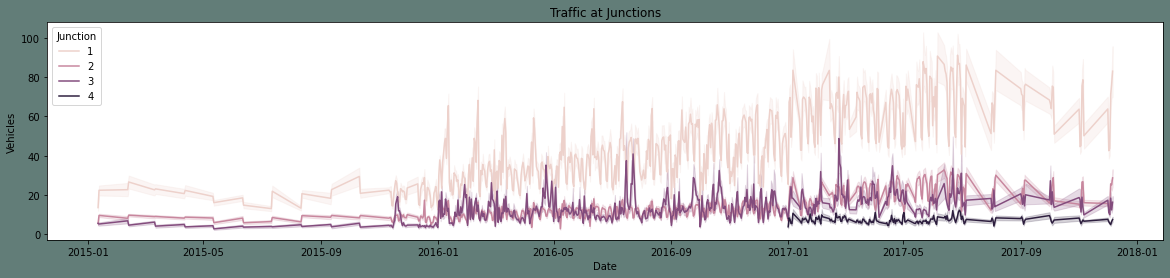

In [8]:
# Create a visualization   
plt.figure(figsize = (20,4),facecolor="#627D78")
Ts = sns.lineplot(x=traffic_data['Date'],y="Vehicles",data=traffic_data, hue="Junction")  
Ts.set_title("Traffic at Junctions")  
Ts.set_ylabel("Vehicles")  
Ts.set_xlabel("Date")  

In [9]:
traffic_data['Year'] = pd.to_datetime(traffic_data['Date']).dt.year
traffic_data['Date_no'] = pd.to_datetime(traffic_data['Date']).dt.day
traffic_data['Month'] = pd.to_datetime(traffic_data['Date']).dt.month

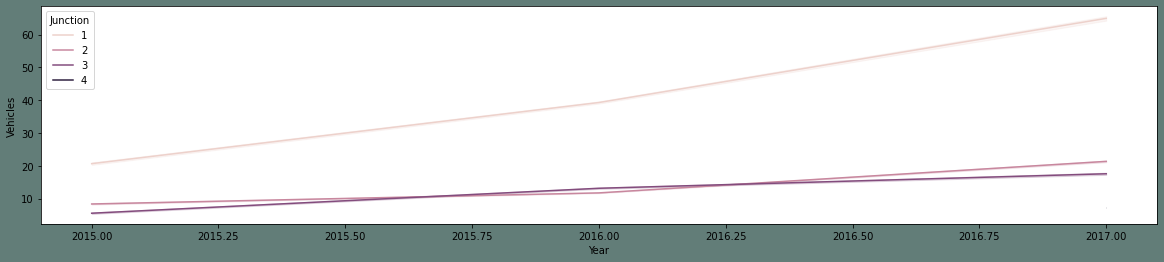

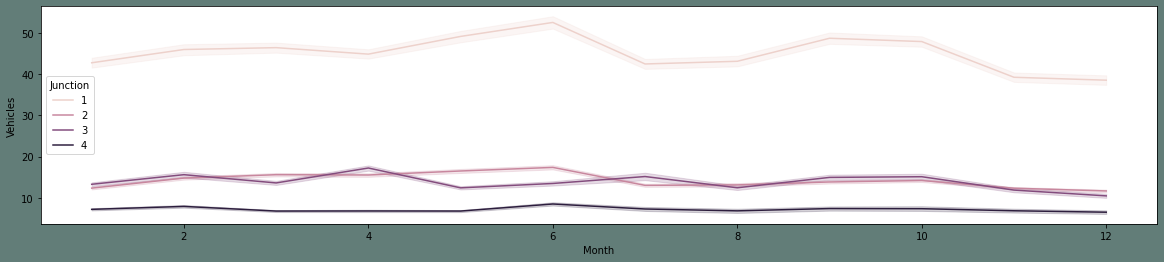

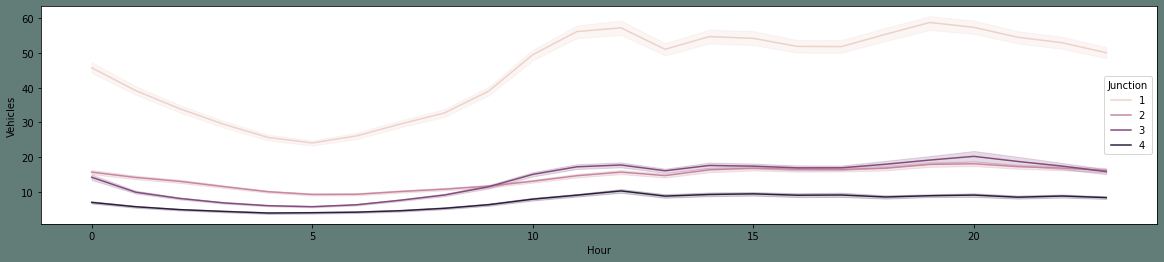

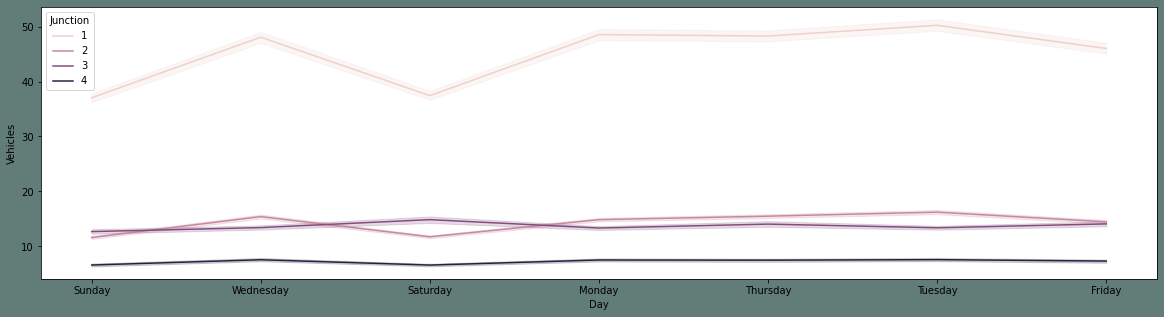

In [10]:
features = ['Year','Month','Hour']
for i in features:
    plt.figure(figsize=(20,4),facecolor="#627D78")
    plot = sns.lineplot(x=traffic_data[i],y = 'Vehicles',data = traffic_data,hue="Junction")
    

plt.figure(figsize=(20,5),facecolor="#627D78")
pl = sns.lineplot(x=traffic_data['Day'],y='Vehicles',data = traffic_data,hue="Junction")

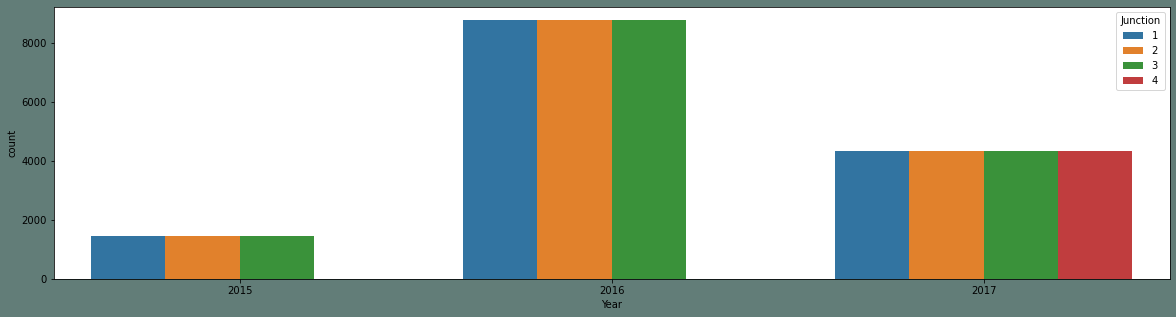

In [11]:
plt.figure(figsize=(20,5),facecolor="#627D78")
pl = sns.countplot(x = traffic_data['Year'],data = traffic_data,hue="Junction")

<AxesSubplot:>

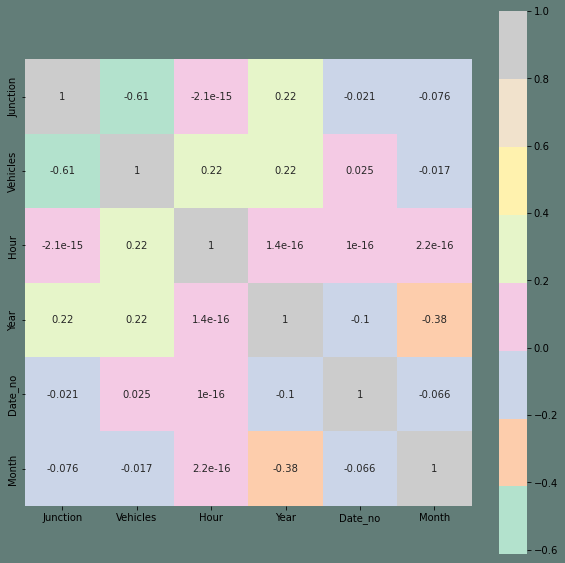

In [12]:
cormat = traffic_data.corr()
plt.subplots(figsize=(10,10),facecolor="#627D78")
sns.heatmap(cormat,annot=True,square=True,cmap="Pastel2")

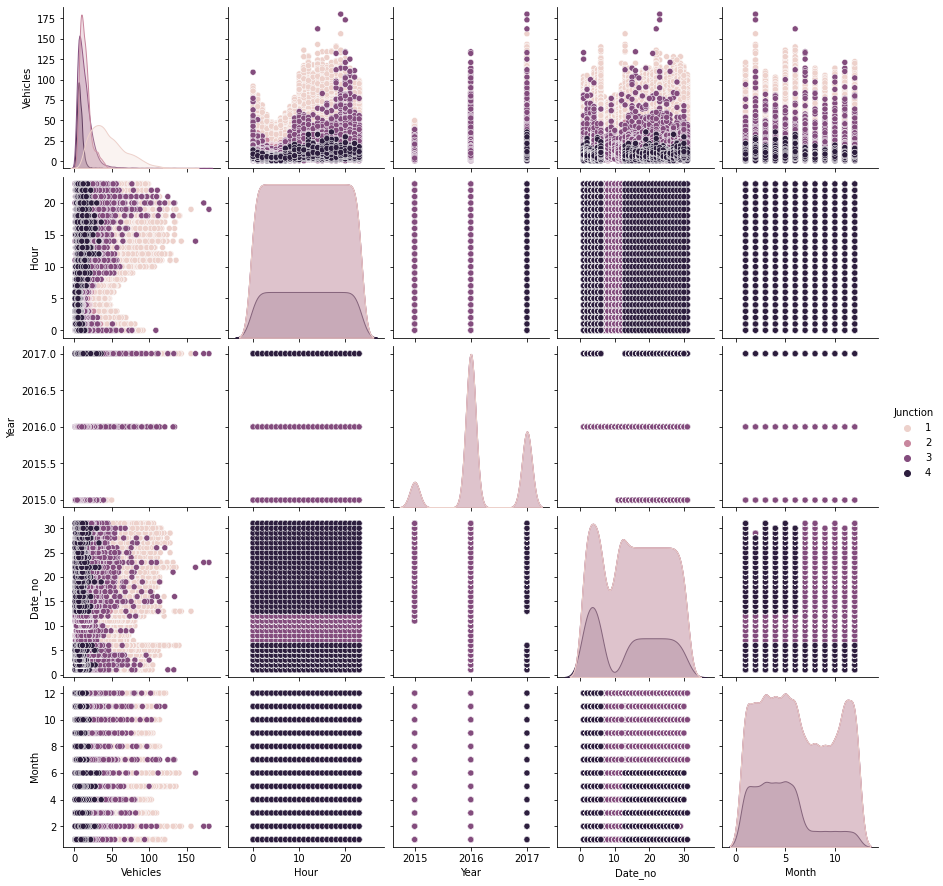

In [13]:
# Concluding our EDA (Exploratory Data Analysis)
# ploting the pairplot to study the realtio betwwen each variable.

sns.pairplot(data=traffic_data,hue="Junction")

In [14]:
data_junction = pd.read_csv("T2.csv")

In [15]:
data_junction = data_junction.drop(['ID'],axis=1)

In [16]:
# Making Unique frame at each junction
data_junction = data_junction.pivot(columns='Junction',index='DateTime')
data_junction

Vehicles                
Junction                1     2     3   4
DateTime                                 
01-01-2016 00:00     13.0   8.0   3.0 NaN
01-01-2016 01:00     13.0   1.0   5.0 NaN
01-01-2016 02:00     11.0   3.0   4.0 NaN
01-01-2016 03:00      6.0   7.0   1.0 NaN
01-01-2016 04:00      8.0   4.0   1.0 NaN
...                   ...   ...   ...  ..
31-12-2016 19:00     33.0  11.0  15.0 NaN
31-12-2016 20:00     37.0   7.0   7.0 NaN
31-12-2016 21:00     32.0  12.0  14.0 NaN
31-12-2016 22:00     33.0  10.0  13.0 NaN
31-12-2016 23:00     32.0   9.0  10.0 NaN

[14592 rows x 4 columns]

In [17]:
data_junction.describe()

Vehicles                                         
Junction             1             2             3            4
count     14592.000000  14592.000000  14592.000000  4344.000000
mean         45.052906     14.253221     13.694010     7.251611
std          23.008345      7.401307     10.436005     3.521455
min           5.000000      1.000000      1.000000     1.000000
25%          27.000000      9.000000      7.000000     5.000000
50%          40.000000     13.000000     11.000000     7.000000
75%          59.000000     17.000000     18.000000     9.000000
max         156.000000     48.000000    180.000000    36.000000

In [18]:
data_1 = data_junction[[('Vehicles',1)]]
data_2 = data_junction[[('Vehicles',2)]]
data_3 = data_junction[[('Vehicles',3)]]
data_4 = data_junction[[('Vehicles',4)]]

In [19]:
# As we have null values data_4 we need to drop those values
data_4 = data_4.dropna()

In [20]:
data_4

,Vehicles
Junction,4
DateTime,
01-01-2017 00:00,3.0
01-01-2017 01:00,1.0
01-01-2017 02:00,4.0
01-01-2017 03:00,4.0
01-01-2017 04:00,2.0
...,...
31-05-2017 19:00,12.0
31-05-2017 20:00,15.0


[Text(0, 0.5, 'Junction4')]

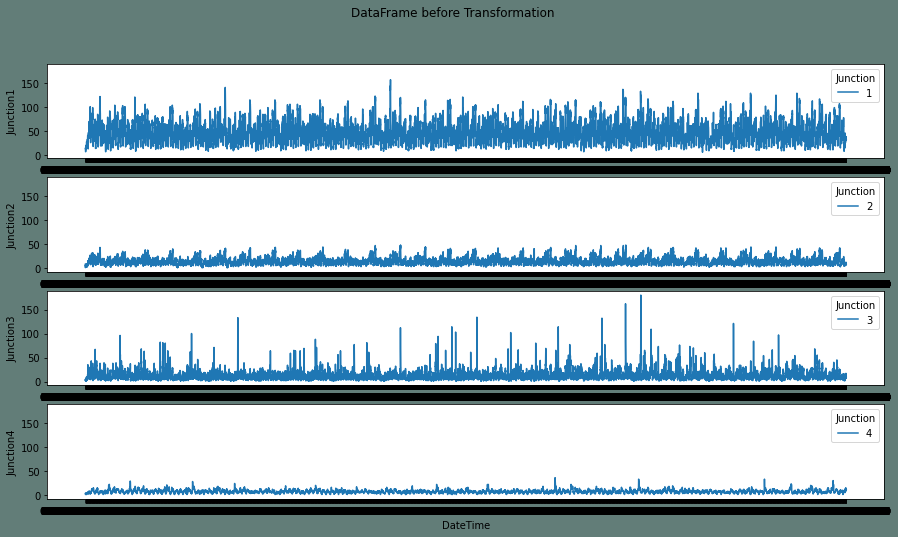

In [21]:
# This plot are done to display the test for stationary.
fig, axis = plt.subplots(4, 1, figsize=(15, 8),facecolor="#627D78", sharey=True)
fig.suptitle("DataFrame before Transformation")
p1 = sns.lineplot(ax=axis[0],data=data_1.Vehicles)
axis[0].set(ylabel="Junction1")
p2 = sns.lineplot(ax=axis[1],data=data_2.Vehicles)
axis[1].set(ylabel="Junction2")
p3 = sns.lineplot(ax=axis[2],data=data_3.Vehicles)
axis[2].set(ylabel="Junction3")
p4 = sns.lineplot(ax=axis[3],data=data_4.Vehicles)
axis[3].set(ylabel="Junction4")

In [22]:
# Normalization and Differencing is applied to make the data stationary.
# Normailize Function
def Normalize(dataframe,column):
    average = dataframe[column].mean()
    stdev = dataframe[column].std()
    df_normalize = (dataframe[column]-average)/stdev
    df_normalize = pd.DataFrame(df_normalize)
    return df_normalize,average,stdev

# Differencing function
def Difference(dataframe,column,interval):
    diff = []
    for i in range(interval,len(dataframe)):
        value = dataframe[column][i] - dataframe[column][i-interval]
        diff.append(value)
    return diff

In [23]:
dataframe1_N1,avg1,std1 = Normalize(data_1,"Vehicles")
diff_1 = Difference(dataframe1_N1,column = 1,interval=(24*7))
dataframe1_N1 = dataframe1_N1[24*7:]  
dataframe1_N1.columns = ["Norm"]  
dataframe1_N1["Diff"]= diff_1  
dataframe1_N1

,Norm,Diff
DateTime,,
01-04-2017 00:00,0.780025,2.173125
01-04-2017 01:00,0.345401,1.738500
01-04-2017 02:00,-0.176149,1.303875
01-04-2017 03:00,-0.263074,1.434262
01-04-2017 04:00,-0.610774,0.999637
...,...,...
31-12-2016 19:00,-0.523849,-2.042737
31-12-2016 20:00,-0.349999,-1.781962
31-12-2016 21:00,-0.567312,-1.477725


In [24]:
dataframe2_N2,avg2,std2 = Normalize(data_2,"Vehicles")
diff_2 = Difference(dataframe2_N2,column = 2,interval=(24))
dataframe2_N2 = dataframe2_N2[24:]  
dataframe2_N2.columns = ["Norm"]  
dataframe2_N2["Diff"]= diff_2  
dataframe2_N2

,Norm,Diff
DateTime,,
01-01-2017 00:00,-0.979992,-0.135111
01-01-2017 01:00,-0.709769,1.080890
01-01-2017 02:00,-1.385326,0.135111
01-01-2017 03:00,-1.385326,-0.405334
01-01-2017 04:00,-1.115103,0.270223
...,...,...
31-12-2016 19:00,-0.439547,0.270223
31-12-2016 20:00,-0.979992,-0.405334
31-12-2016 21:00,-0.304436,0.810668


In [25]:
dataframe3_N3,avg3,std3 = Normalize(data_3,"Vehicles")
diff_3 = Difference(dataframe3_N3,column = 3,interval=(1))
dataframe3_N3 = dataframe3_N3[1:]  
dataframe3_N3.columns = ["Norm"]  
dataframe3_N3["Diff"]= diff_3  
dataframe3_N3

,Norm,Diff
DateTime,,
01-01-2016 01:00,-0.833078,0.191644
01-01-2016 02:00,-0.928901,-0.095822
01-01-2016 03:00,-1.216367,-0.287466
01-01-2016 04:00,-1.216367,0.000000
01-01-2016 05:00,-0.833078,0.383288
...,...,...
31-12-2016 19:00,0.125143,0.383288
31-12-2016 20:00,-0.641434,-0.766577
31-12-2016 21:00,0.029321,0.670755


In [26]:
dataframe4_N4,avg4,std4 = Normalize(data_4,"Vehicles")
diff_4 = Difference(dataframe4_N4,column = 4,interval=(1))
dataframe4_N4 = dataframe4_N4[1:]  
dataframe4_N4.columns = ["Norm"]  
dataframe4_N4["Diff"]= diff_4  
dataframe4_N4

,Norm,Diff
DateTime,,
01-01-2017 01:00,-1.775292,-0.567947
01-01-2017 02:00,-0.923372,0.851921
01-01-2017 03:00,-0.923372,0.000000
01-01-2017 04:00,-1.491319,-0.567947
01-01-2017 05:00,-1.775292,-0.283974
...,...,...
31-05-2017 19:00,1.348417,1.419868
31-05-2017 20:00,2.200338,0.851921
31-05-2017 21:00,0.496496,-1.703841


[Text(0, 0.5, 'Junction4')]

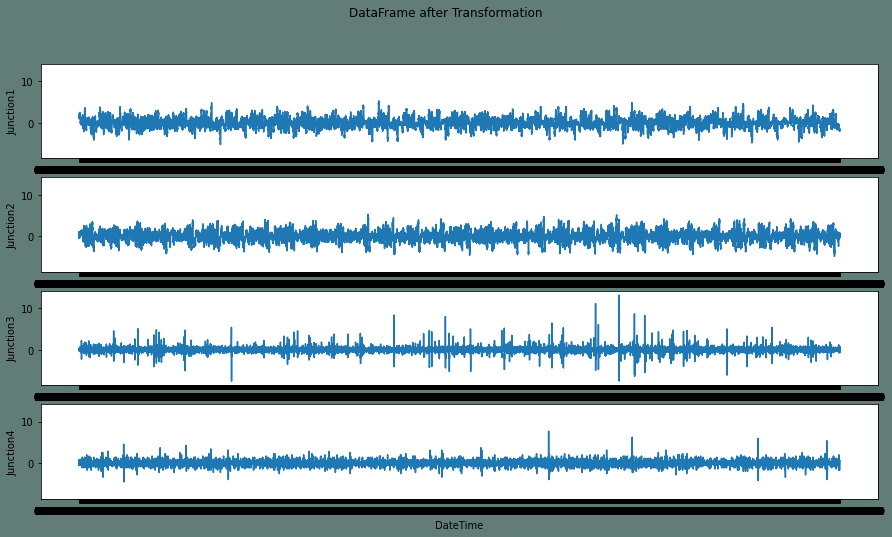

In [41]:
fig, axis = plt.subplots(4, 1, figsize=(15, 8),facecolor="#627D78", sharey=True)
fig.suptitle("DataFrame after Transformation")
p1 = sns.lineplot(ax=axis[0],data=dataframe1_N1.Diff)
axis[0].set(ylabel="Junction1")
p2 = sns.lineplot(ax=axis[1],data=dataframe2_N2.Diff)
axis[1].set(ylabel="Junction2")
p3 = sns.lineplot(ax=axis[2],data=dataframe3_N3.Diff)
axis[2].set(ylabel="Junction3")
p4 = sns.lineplot(ax=axis[3],data=dataframe4_N4.Diff)
axis[3].set(ylabel="Junction4")

In [42]:
from statsmodels.tsa.stattools import adfuller

# Dickey-Fuller test
def Stationary_check(dataframe):
    check = adfuller(dataframe.dropna())
    print(f"ADF Statistic: {check[0]}")
    print(f"p-value: {check[1]}")
    print("Critical Values:")
    for key,value in check[4].items():
        print('\t%s: %.3f' % (key, value))
    if check[0] > check[4]["1%"]:
        print("Time Series is Non-Stationary")  
    else:  
        print("Time Series is Stationary")  

list = [dataframe1_N1["Diff"],dataframe2_N2["Diff"],dataframe3_N3["Diff"],dataframe4_N4["Diff"]]
for i in list:
    print("\n")
    Stationary_check(i)



ADF Statistic: -10.949577330172309
p-value: 8.867666034148789e-20
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -20.062610290296888
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -33.853064085588926
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -15.649812888416703
p-value: 1.6016794320990493e-28
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Time Series is Stationary


In [43]:
dataframe1 = dataframe1_N1["Diff"].dropna()
dataframe1 = pd.DataFrame(dataframe1)

dataframe2 = dataframe2_N2["Diff"].dropna()
dataframe2 = pd.DataFrame(dataframe2)

dataframe3 = dataframe3_N3["Diff"].dropna()
dataframe3 = pd.DataFrame(dataframe3)

dataframe4 = dataframe4_N4["Diff"].dropna()
dataframe4 = pd.DataFrame(dataframe4)

In [44]:
def Split_data(dataframe):
    training_size = int(.5*len(dataframe))
    data_len = len(dataframe)
    train,test = dataframe[0:training_size],dataframe[training_size:data_len]
    train,test = train.values.reshape(-1,1),test.values.reshape(-1,1)
    return train,test

Junction1_train, Junction1_test = Split_data(dataframe1)  
Junction2_train, Junction2_test = Split_data(dataframe2)  
Junction3_train, Junction3_test = Split_data(dataframe3) 
print(Junction3_train.size,Junction3_test.size)
Junction4_train, Junction4_test = Split_data(dataframe4)

def target_and_feature(dataframe):  
    end_len = len(dataframe)  
    X = []  
    y = []  
    steps = 32  
    for i in range(steps, end_len):  
        X.append(dataframe[i - steps:i, 0])  
        y.append(dataframe[i, 0])  
    X, y = np.array(X), np.array(y)  
    return X ,y  

def FeatureFixShape(train, test):  
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))  
    test = np.reshape(test, (test.shape[0],test.shape[1],1))  
    return train, test 


7295 7296


In [45]:
X_train_Junction1, y_train_Junction1 = target_and_feature(Junction1_train)  
X_test_Junction1, y_test_Junction1 = target_and_feature(Junction1_test) 
X_train_Junction1, X_test_Junction1 = FeatureFixShape(X_train_Junction1, X_test_Junction1)

In [46]:
X_train_Junction2, y_train_Junction2 = target_and_feature(Junction2_train)  
X_test_Junction2, y_test_Junction2 = target_and_feature(Junction2_test)  
X_train_Junction2, X_test_Junction2 = FeatureFixShape(X_train_Junction2, X_test_Junction2)  

In [47]:
X_train_Junction3, y_train_Junction3 = target_and_feature(Junction3_train)  
X_test_Junction3, y_test_Junction3 = target_and_feature(Junction3_test)  
X_train_Junction3, X_test_Junction3 = FeatureFixShape(X_train_Junction3, X_test_Junction3) 

In [48]:
X_train_Junction4, y_train_Junction4 = target_and_feature(Junction4_train)  
x_test_Junction4, y_test_Junction4 = target_and_feature(Junction4_test)  
X_train_Junction4, x_test_Junction4 = FeatureFixShape(X_train_Junction4, x_test_Junction4)

In [93]:
  
def GRU_model(X_Train, y_Train, X_Test):  
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True)
    
    #The GRU model  
    model = Sequential()  
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2)) 
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
    model.add(Dense(units=1))
     
    learning_rate_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=1000,
    decay_rate=1e-7
    )
    
    callback = [early_stopping]
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=learning_rate_schedule),loss='mean_squared_error')  
    model.fit(X_Train,y_Train, epochs=50,batch_size=150)  
    pred_GRU= model.predict(X_Test)   
    return pred_GRU

def RMSE_Value(test,pred):
    sum = 0
    for i in range(0,len(test),1):
        sum += (pred[i] - test[i])**2
    sum = sum/len(test)
    
    return math.sqrt(sum)

def Plot(test,pred):
    plt.figure(figsize=(12,5),facecolor="#627D78")  
    plt.plot(test,label="True Value",alpha=0.5)  
    plt.plot(pred, color="#627D78",label="Predicted Values")  
    plt.title("GRU Traffic Prediction Vs True values")  
    plt.xlabel("DateTime")  
    plt.ylabel("Number of Vehicles")  
    plt.legend()  
    plt.show() 

In [94]:
PredJ1 = GRU_model(X_train_Junction1,y_train_Junction1,X_test_Junction1)
PredJ1 = PredJ1.reshape(-1, PredJ1.shape[-1])
RMSE_J1=RMSE_Value(y_test_Junction1,PredJ1)  
print(f"Root-Mean Square Error: {RMSE_J1}")

Epoch 1/50
48/48 [==============================] - 27s 458ms/step - loss: 2.2925
Epoch 2/50
48/48 [==============================] - 20s 418ms/step - loss: 2.2874
Epoch 3/50
48/48 [==============================] - 26s 538ms/step - loss: 2.2845
Epoch 4/50
48/48 [==============================] - 22s 457ms/step - loss: 2.2839
Epoch 5/50
48/48 [==============================] - 21s 429ms/step - loss: 2.2837
Epoch 6/50
48/48 [==============================] - 20s 427ms/step - loss: 2.2834
Epoch 7/50
48/48 [==============================] - 20s 425ms/step - loss: 2.2833
Epoch 8/50
48/48 [==============================] - 21s 436ms/step - loss: 2.2833
Epoch 9/50
48/48 [==============================] - 21s 431ms/step - loss: 2.2832
Epoch 10/50
48/48 [==============================] - 21s 447ms/step - loss: 2.2833
Epoch 11/50
48/48 [==============================] - 24s 508ms/step - loss: 2.2832
Epoch 12/50
48/48 [==============================] - 23s 471ms/step - loss: 2.2832
Epoch 13/50
4

In [52]:
PredJ2 = GRU_model(X_train_Junction2,y_train_Junction2,X_test_Junction2)
PredJ2 = PredJ2.reshape(-1, PredJ2.shape[-1])
RMSE_J2=RMSE_Value(y_test_Junction2,PredJ2)  
print(f"Root-Mean Square Error: {RMSE_J2}")

Epoch 1/50
146/146 [==============================] - 62s 339ms/step - loss: 1.9075
Epoch 2/50
146/146 [==============================] - 48s 330ms/step - loss: 1.8996
Epoch 3/50
146/146 [==============================] - 48s 327ms/step - loss: 1.8975
Epoch 4/50
146/146 [==============================] - 48s 329ms/step - loss: 1.8973
Epoch 5/50
146/146 [==============================] - 48s 330ms/step - loss: 1.8973
Epoch 6/50
146/146 [==============================] - 48s 328ms/step - loss: 1.8973
Epoch 7/50
146/146 [==============================] - 48s 327ms/step - loss: 1.8973
Epoch 8/50
146/146 [==============================] - 47s 322ms/step - loss: 1.8973
Epoch 9/50
146/146 [==============================] - 44s 300ms/step - loss: 1.8972
Epoch 10/50
146/146 [==============================] - 44s 304ms/step - loss: 1.8973
Epoch 11/50
146/146 [==============================] - 46s 314ms/step - loss: 1.8973
Epoch 12/50
146/146 [==============================] - 46s 317ms/step - lo

In [53]:
PredJ3 = GRU_model(X_train_Junction3,y_train_Junction3,X_test_Junction3)
PredJ3 = PredJ3.reshape(-1, PredJ3.shape[-1])
RMSE_J3=RMSE_Value(y_test_Junction3,PredJ3)  
print(f"Root-Mean Square Error: {RMSE_J3}")

Epoch 1/50
146/146 [==============================] - 43s 211ms/step - loss: 0.3137
Epoch 2/50
146/146 [==============================] - 29s 196ms/step - loss: 0.3114
Epoch 3/50
146/146 [==============================] - 28s 192ms/step - loss: 0.3112
Epoch 4/50
146/146 [==============================] - 29s 200ms/step - loss: 0.3112
Epoch 5/50
146/146 [==============================] - 29s 202ms/step - loss: 0.3112
Epoch 6/50
146/146 [==============================] - 30s 204ms/step - loss: 0.3112
Epoch 7/50
146/146 [==============================] - 30s 202ms/step - loss: 0.3112
Epoch 8/50
146/146 [==============================] - 30s 205ms/step - loss: 0.3112
Epoch 9/50
146/146 [==============================] - 29s 201ms/step - loss: 0.3112
Epoch 10/50
146/146 [==============================] - 30s 203ms/step - loss: 0.3112
Epoch 11/50
146/146 [==============================] - 30s 206ms/step - loss: 0.3112
Epoch 12/50
146/146 [==============================] - 30s 209ms/step - lo

In [55]:
PredJ4 = GRU_model(X_train_Junction4,y_train_Junction4,x_test_Junction4)
PredJ4 = PredJ4.reshape(-1, PredJ4.shape[-1])
RMSE_J4=RMSE_Value(y_test_Junction4,PredJ4)  
print(f"Root-Mean Square Error: {RMSE_J4}")

Epoch 1/50
43/43 [==============================] - 17s 109ms/step - loss: 0.7297
Epoch 2/50
43/43 [==============================] - 5s 113ms/step - loss: 0.7236
Epoch 3/50
43/43 [==============================] - 5s 113ms/step - loss: 0.7230
Epoch 4/50
43/43 [==============================] - 5s 115ms/step - loss: 0.7228
Epoch 5/50
43/43 [==============================] - 5s 114ms/step - loss: 0.7219
Epoch 6/50
43/43 [==============================] - 5s 117ms/step - loss: 0.7217
Epoch 7/50
43/43 [==============================] - 5s 115ms/step - loss: 0.7215
Epoch 8/50
43/43 [==============================] - 5s 118ms/step - loss: 0.7214
Epoch 9/50
43/43 [==============================] - 5s 117ms/step - loss: 0.7214
Epoch 10/50
43/43 [==============================] - 5s 120ms/step - loss: 0.7213
Epoch 11/50
43/43 [==============================] - 5s 120ms/step - loss: 0.7213
Epoch 12/50
43/43 [==============================] - 5s 120ms/step - loss: 0.7213
Epoch 13/50
43/43 [=====

In [58]:
Junctions = ["Junction1", "Junction2", "Junction3", "Junction4"]  
RMSE = [RMSE_J1, RMSE_J2, RMSE_J3, RMSE_J4]  
list_of_tuples = zip(Junctions, RMSE)    
Results = pd.DataFrame(list_of_tuples, columns=["Junction", "RMSE"])  
Results.style.background_gradient(cmap="Pastel1") 

,Junction,RMSE
0,Junction1,1.490342
1,Junction2,1.501867
2,Junction3,0.650371
3,Junction4,0.886243


In [91]:
def inverse_difference(last_ob, value):  
    inversed = value + last_ob  
    return inversed  
  
#Plotting the comparison  
def Sub_Plots2(df_1, df_2,title,m):  
    fig, axes = plt.subplots(1, 2, figsize=(18,4), sharey=True,facecolor="#627D78")  
    fig.suptitle(title)  
     
    pl_1=sns.lineplot(ax=axes[0],data=df_1)  
    axes[0].set(ylabel ="Prediction")  
     
    pl_2=sns.lineplot(ax=axes[1],data=df_2['Vehicles'],color="#627D78")  
    axes[1].set(ylabel ="Orignal")  

In [79]:
# invert the differenced forecast for Junction 1  
recover1 = pd.DataFrame(dataframe1_N1.Norm[-1412:-1])  
recover1["Pred"]= PredJ1  
Transform_reverssed_J1 = pd.DataFrame(inverse_difference(recover1.Norm, recover1.Pred))  
Transform_reverssed_J1.columns = ["Pred_Normed"]   

In [84]:
#Invert the normalization J1
Final_J1_Pred = []
for i in Transform_reverssed_J1.values:
    Final_J1_Pred = (i * std1) + avg1  
Transform_reverssed_J1["Pred_Final"] =Final_J1_Pred  

In [87]:
#Plotting the Predictions with originals  
PredJ1 = pd.DataFrame(PredJ1)

KeyError: 'Vehicles'

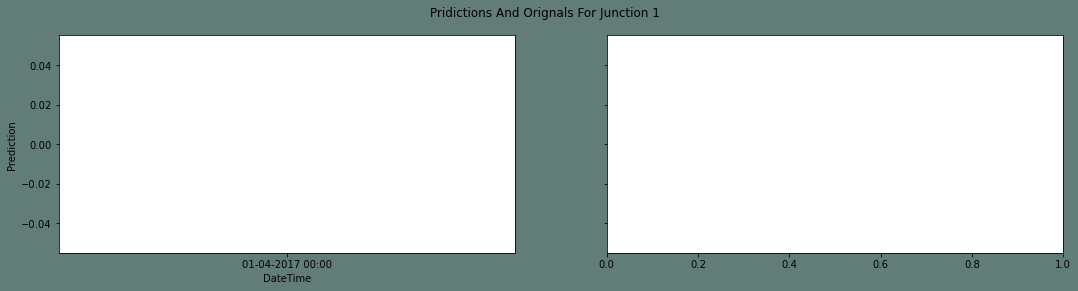

In [92]:
Sub_Plots2(Transform_reverssed_J1["Pred_Final"], dataframe1[-1412:-1],"Pridictions And Orignals For Junction 1", 0)